In [3]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### SA, StimOnset, belief partitions sig units, Confidence:

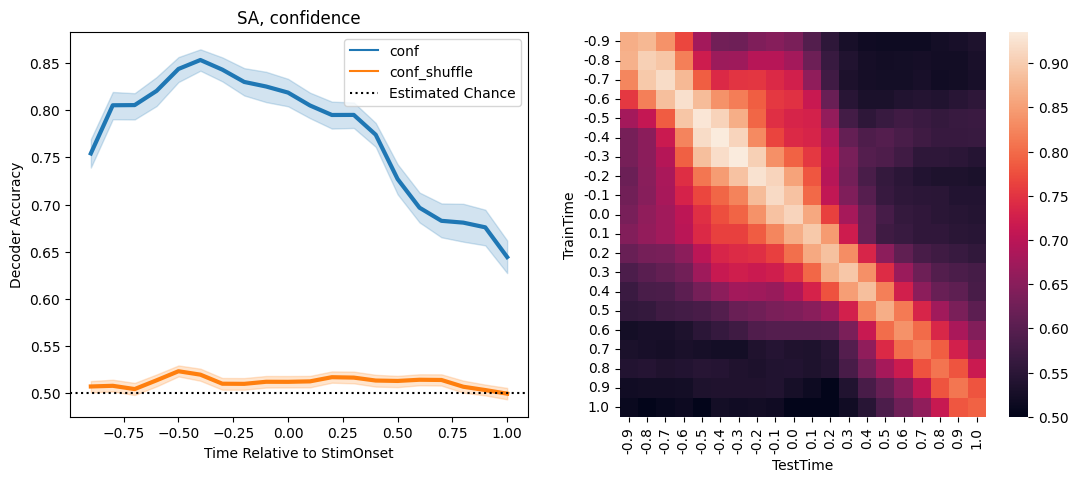

In [12]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_95th"

res = belief_partitions_io.read_results(args, FEATURES)
cross_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
visualization_utils.visualize_preferred_beliefs(args, res, ax1, hue_col="mode")
ax1.set_title("SA, confidence")

visualization_utils.visualize_cross_time(args, cross_res, res, ax2)


### SA, StimOnset, belief partitions sig units, Preference:

Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9


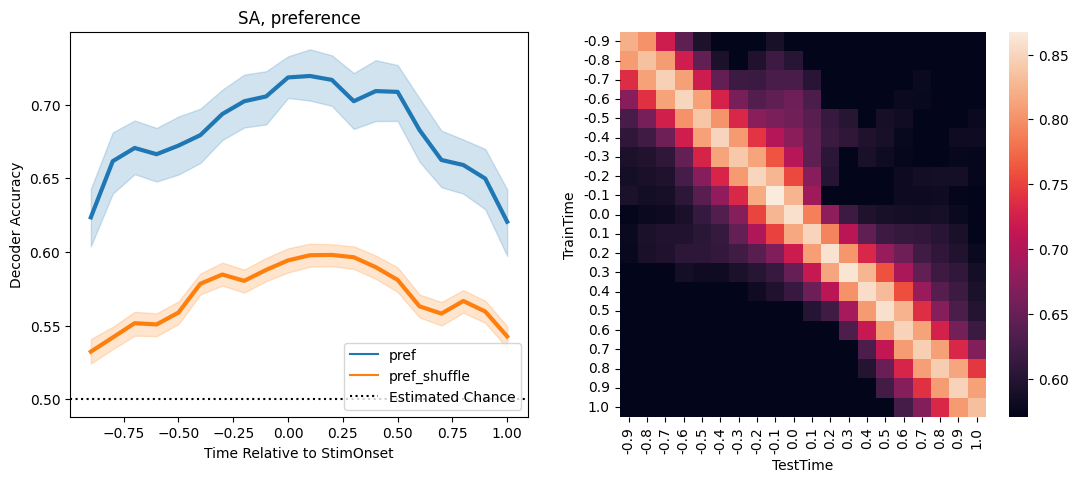

In [17]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_partition_95th"

res = belief_partitions_io.read_results(args, FEATURES)
cross_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
visualization_utils.visualize_preferred_beliefs(args, res, ax1, hue_col="mode")
ax1.set_title("SA, preference")

visualization_utils.visualize_cross_time(args, cross_res, res, ax2)


### SA, StimOnset, Belief Partitions selective units, "Policy"

Warning, shuffle not found: MAGENTA_policy_shuffle_7
Warning, shuffle not found: MAGENTA_policy_shuffle_9
Warning, shuffle not found: RIPPLE_policy_shuffle_9


Text(0.5, 1.0, 'SA, policy')

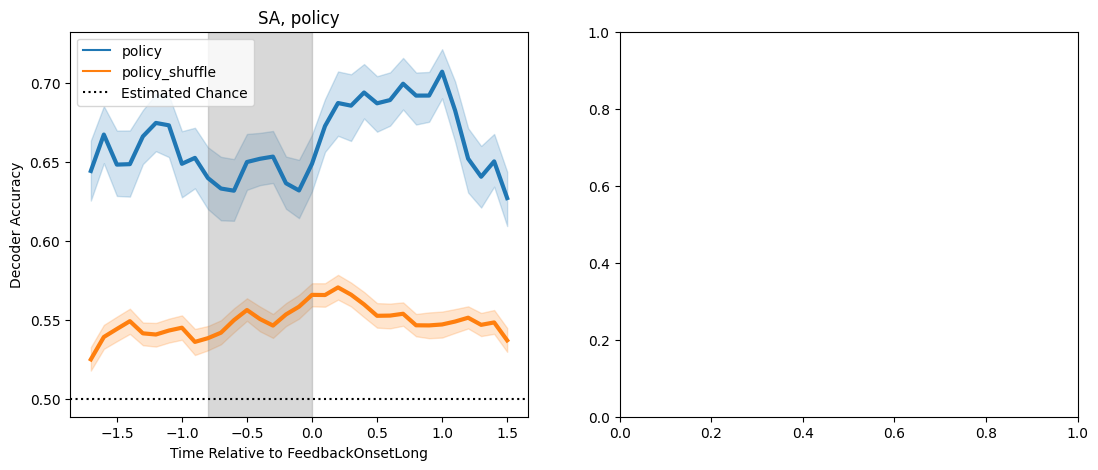

In [4]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "policy"
args.sig_unit_level = "belief_partition_95th"
args.trial_event = "FeedbackOnsetLong"
res = belief_partitions_io.read_results(args, FEATURES)

# cross_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)
# pivoted = cross_res.pivot(index="TrainTime", columns="TestTime", values="Accuracy")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
visualization_utils.visualize_preferred_beliefs(args, res, ax1, hue_col="mode")
ax1.set_title("SA, policy")

# sns.heatmap(pivoted, ax=ax2, vmin=0.50)


### SA, StimOnset, preference selective units, Confidence:

<Axes: xlabel='TestTime', ylabel='TrainTime'>

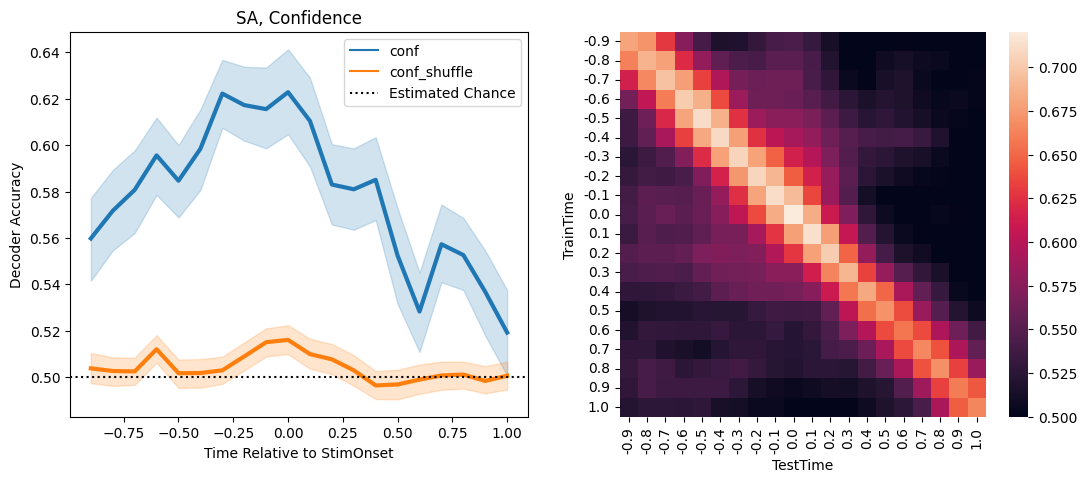

In [7]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_pref_95th"

res = belief_partitions_io.read_results(args, FEATURES)

cross_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)
pivoted = cross_res.pivot(index="TrainTime", columns="TestTime", values="Accuracy")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
visualization_utils.visualize_preferred_beliefs(args, res, ax1, hue_col="mode")
ax1.set_title("SA, Confidence")

sns.heatmap(pivoted, ax=ax2, vmin=0.50)




### SA, StimOnset, preference sig units, preference

Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9


<Axes: xlabel='TestTime', ylabel='TrainTime'>

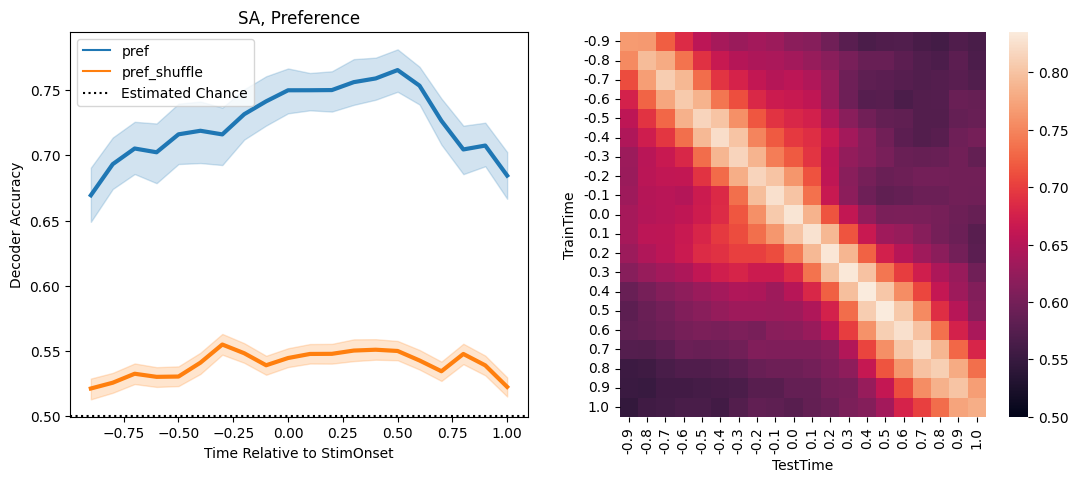

In [8]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_pref_95th"

res = belief_partitions_io.read_results(args, FEATURES)

cross_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)
pivoted = cross_res.pivot(index="TrainTime", columns="TestTime", values="Accuracy")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
visualization_utils.visualize_preferred_beliefs(args, res, ax1, hue_col="mode")
ax1.set_title("SA, Preference")

sns.heatmap(pivoted, ax=ax2, vmin=0.50)




### SA, FeedbackOnsetLong, Belief Partition selective units, preference:

Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9


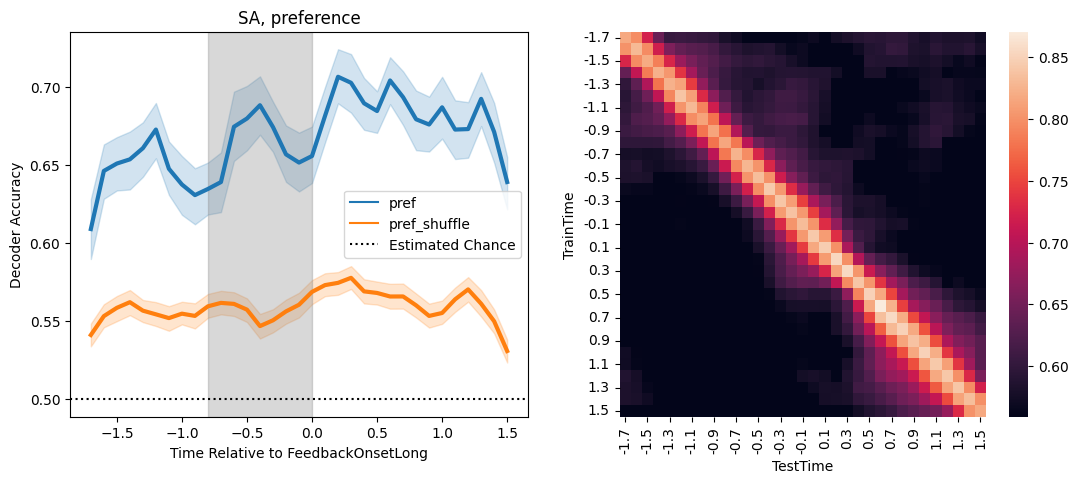

In [16]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_partition_95th"
args.trial_event = "FeedbackOnsetLong"

res = belief_partitions_io.read_results(args, FEATURES)

cross_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
visualization_utils.visualize_preferred_beliefs(args, res, ax1, hue_col="mode")
ax1.set_title("SA, preference")

visualization_utils.visualize_cross_time(args, cross_res, res, ax2)



### SA, FeedbackOnsetLong, Belief Partition selective units, conf:

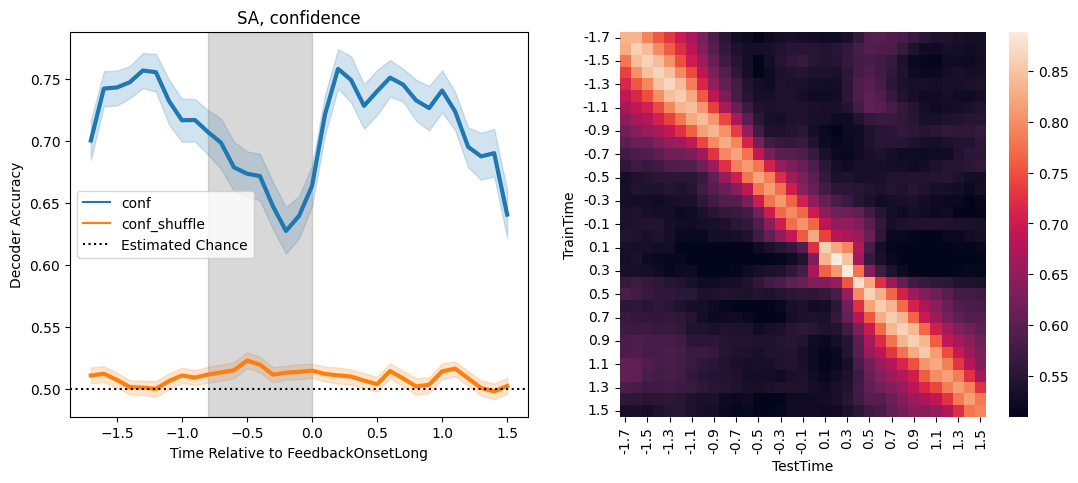

In [19]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_95th"
args.trial_event = "FeedbackOnsetLong"

res = belief_partitions_io.read_results(args, FEATURES)

cross_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
visualization_utils.visualize_preferred_beliefs(args, res, ax1, hue_col="mode")
ax1.set_title("SA, confidence")
visualization_utils.visualize_cross_time(args, cross_res, res, ax2)



### What is cosine similarity of weights between conf and preference decoders? (Partition subpop)

<Axes: xlabel='Time', ylabel='cosine_sim'>

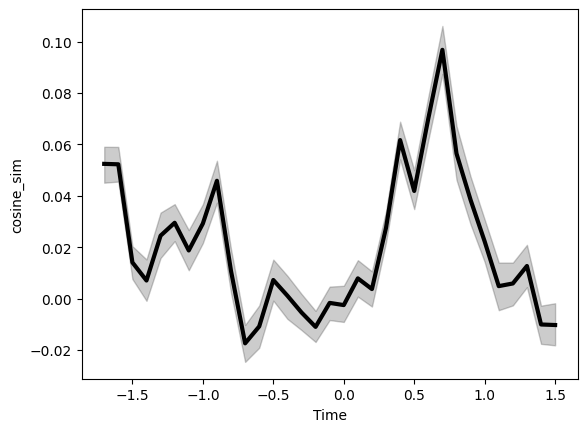

In [12]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_95th"
args.trial_event = "StimOnset"
args.trial_event = "FeedbackOnsetLong"


conf_models = belief_partitions_io.read_models(args, FEATURES)
conf_models["weights"] = conf_models.apply(lambda x: x.models.coef_[x.models.labels_to_idx["High"], :], axis=1)
conf_weights = conf_models[["Time", "feat", "run", "weights"]]

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_partition_95th"
args.trial_event = "StimOnset"
args.trial_event = "FeedbackOnsetLong"


pref_models = belief_partitions_io.read_models(args, FEATURES)
pref_models["weights"] = pref_models.apply(lambda x: x.models.coef_[x.models.labels_to_idx["High X"], :], axis=1)
pref_weights = pref_models[["Time", "feat", "run", "weights"]]

sim_res = classifier_utils.get_cross_cond_cosine_sim_of_weights(pref_weights, conf_weights)
sns.lineplot(sim_res, x="Time", y="cosine_sim", linewidth=3, color="black")


### What is cosine similarity of weights between conf and preference decoders? (Preference subpop)

In [11]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_pref_95th"


conf_models = belief_partitions_io.read_models(args, FEATURES)
conf_models["weights"] = conf_models.apply(lambda x: x.models.coef_[x.models.labels_to_idx["High"], :], axis=1)
conf_weights = conf_models[["Time", "feat", "run", "weights"]]

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_pref_95th"

pref_models = belief_partitions_io.read_models(args, FEATURES)
pref_models["weights"] = pref_models.apply(lambda x: x.models.coef_[x.models.labels_to_idx["High X"], :], axis=1)
pref_weights = pref_models[["Time", "feat", "run", "weights"]]

FileNotFoundError: [Errno 2] No such file or directory: '/data/patrick_res/belief_partitions/SA_FeedbackOnsetLong_Response_Correct_Choice_Chose_belief_pref_95th_units/CIRCLE_conf_models.npy'

<Axes: xlabel='Time', ylabel='cosine_sim'>

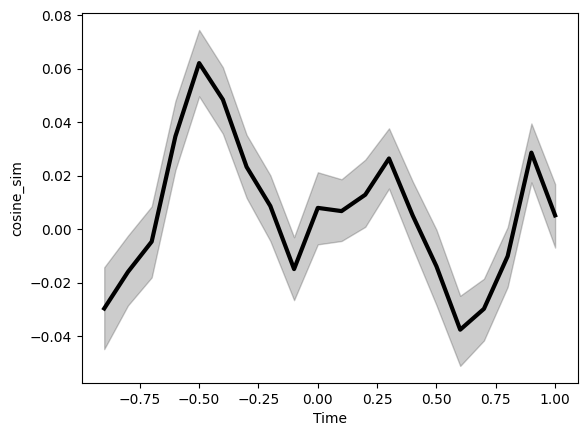

In [13]:
sim_res = classifier_utils.get_cross_cond_cosine_sim_of_weights(pref_weights, conf_weights)
sns.lineplot(sim_res, x="Time", y="cosine_sim", linewidth=3, color="black")


### Cosine sim between conf and policy?

<Axes: xlabel='Time', ylabel='cosine_sim'>

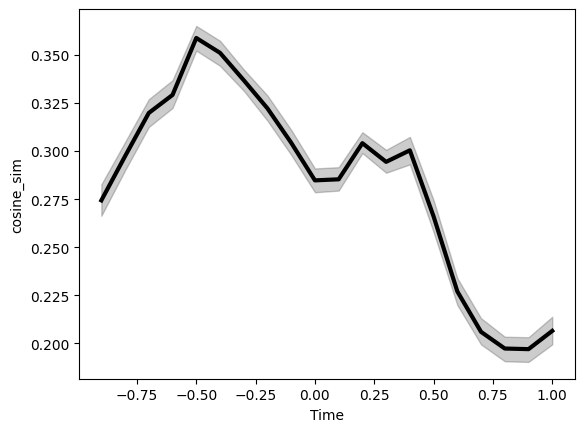

In [9]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_95th"
args.trial_event = "StimOnset"

conf_models = belief_partitions_io.read_models(args, FEATURES)
conf_models["weights"] = conf_models.apply(lambda x: x.models.coef_[x.models.labels_to_idx["High"], :], axis=1)
conf_weights = conf_models[["Time", "feat", "run", "weights"]]

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "policy"
args.sig_unit_level = "belief_partition_95th"
args.trial_event = "StimOnset"


policy_models = belief_partitions_io.read_models(args, FEATURES)
policy_models["weights"] = policy_models.apply(lambda x: x.models.coef_[x.models.labels_to_idx["X"], :], axis=1)
policy_weights = policy_models[["Time", "feat", "run", "weights"]]

sim_res = classifier_utils.get_cross_cond_cosine_sim_of_weights(policy_weights, conf_weights)
sns.lineplot(sim_res, x="Time", y="cosine_sim", linewidth=3, color="black")


<Axes: xlabel='Time', ylabel='cosine_sim'>

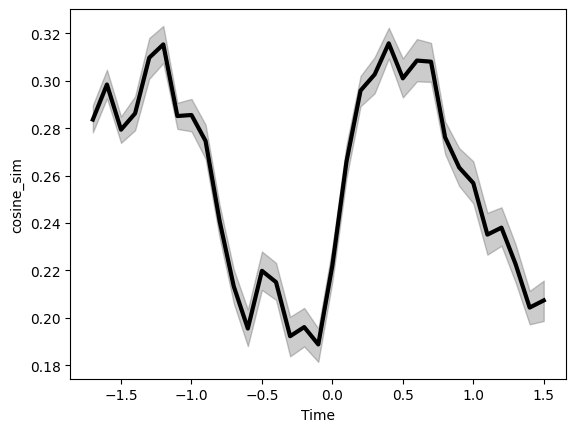

In [10]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_95th"
args.trial_event = "FeedbackOnsetLong"

conf_models = belief_partitions_io.read_models(args, FEATURES)
conf_models["weights"] = conf_models.apply(lambda x: x.models.coef_[x.models.labels_to_idx["High"], :], axis=1)
conf_weights = conf_models[["Time", "feat", "run", "weights"]]

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "policy"
args.sig_unit_level = "belief_partition_95th"
args.trial_event = "FeedbackOnsetLong"


policy_models = belief_partitions_io.read_models(args, FEATURES)
policy_models["weights"] = policy_models.apply(lambda x: x.models.coef_[x.models.labels_to_idx["X"], :], axis=1)
policy_weights = policy_models[["Time", "feat", "run", "weights"]]

sim_res = classifier_utils.get_cross_cond_cosine_sim_of_weights(policy_weights, conf_weights)
sns.lineplot(sim_res, x="Time", y="cosine_sim", linewidth=3, color="black")
